In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Load your dataset
df = pd.read_csv('/content/final_dataset - Sheet1.csv')

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the comments
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['Comment'])

# Convert comments to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['Comment'])
test_sequences = tokenizer.texts_to_sequences(test_df['Comment'])

# Pad sequences
max_sequence_length = max(len(seq) for seq in train_sequences)
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Prepare target data
y_train = np.array(train_df['Stance'])
y_test = np.array(test_df['Stance'])

# Build Kim-CNN model
embedding_dim = 100
filter_sizes = [3, 4, 5]
num_filters = 128

# Input layer
input_comment = Input(shape=(max_sequence_length,), name='input_comment')

# Embedding layer
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)(input_comment)

conv_layers = []
for filter_size in filter_sizes:
    conv_layer = Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu')(embedding_layer)
    pool_layer = GlobalMaxPooling1D()(conv_layer)
    conv_layers.append(pool_layer)

# Concatenate convolutional layers
concatenated_layer = Concatenate()(conv_layers)

# Dense layers
dense_layer = Dense(128, activation='relu')(concatenated_layer)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(1, activation='sigmoid', name='output')(dropout_layer)

# Build and compile the model
model = Model(inputs=input_comment, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate metrics for each target class
unique_targets = df['Target'].unique()

for target_class in unique_targets:
    indices = test_df[test_df['Target'] == target_class].index
    indices = [idx for idx in indices if idx < len(y_test)]  # Filter out-of-bounds indices
    y_test_target = y_test[indices]
    y_pred_target = y_pred_binary[indices]

    accuracy = accuracy_score(y_test_target, y_pred_target)
    precision = precision_score(y_test_target, y_pred_target)
    recall = recall_score(y_test_target, y_pred_target)
    f1 = f1_score(y_test_target, y_pred_target)
    cm = confusion_matrix(y_test_target, y_pred_target)


    print(f'Target {target_class} Metrics:')
    print(f'  Accuracy: {accuracy * 100:.2f}%')
    print(f'  Precision: {precision:.4f}')
    print(f'  Recall: {recall:.4f}')
    print(f'  F1 Score: {f1:.4f}')
    print(f' Confusion Matrix:\n{cm}')
    print('\n')

Epoch 1/10
110/110 [==============================] - 52s 443ms/step - loss: 0.5865 - accuracy: 0.6985 - val_loss: 0.4739 - val_accuracy: 0.7709
Epoch 2/10
110/110 [==============================] - 50s 456ms/step - loss: 0.2598 - accuracy: 0.9006 - val_loss: 0.2964 - val_accuracy: 0.8694
Epoch 3/10
110/110 [==============================] - 50s 458ms/step - loss: 0.0583 - accuracy: 0.9828 - val_loss: 0.3482 - val_accuracy: 0.8797
Epoch 4/10
110/110 [==============================] - 49s 440ms/step - loss: 0.0221 - accuracy: 0.9954 - val_loss: 0.3900 - val_accuracy: 0.8935
Epoch 5/10
110/110 [==============================] - 51s 462ms/step - loss: 0.0120 - accuracy: 0.9983 - val_loss: 0.4619 - val_accuracy: 0.8958
Epoch 6/10
110/110 [==============================] - 53s 484ms/step - loss: 0.0111 - accuracy: 0.9989 - val_loss: 0.4482 - val_accuracy: 0.8843
Epoch 7/10
110/110 [==============================] - 48s 439ms/step - loss: 0.0123 - accuracy: 0.9986 - val_loss: 0.4344 - val_ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and bei

In [3]:
#BiLSTM
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, GlobalMaxPooling1D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Load your dataset
df = pd.read_csv('/content/final_dataset - Sheet1.csv')

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the comments
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['Comment'])

# Convert comments to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['Comment'])
test_sequences = tokenizer.texts_to_sequences(test_df['Comment'])

# Pad sequences
max_sequence_length = max(len(seq) for seq in train_sequences)
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Prepare target data
y_train = np.array(train_df['Stance'])
y_test = np.array(test_df['Stance'])

# Build BiLSTM model
embedding_dim = 100

# Input layer
input_comment = Input(shape=(max_sequence_length,), name='input_comment')

# Embedding layer
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)(input_comment)

# Bidirectional LSTM layer
bi_lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)

# GlobalMaxPooling1D layer
global_max_pooling_layer = GlobalMaxPooling1D()(bi_lstm_layer)

# Dense layers
dense_layer = Dense(32, activation='relu')(global_max_pooling_layer)
output_layer = Dense(1, activation='sigmoid', name='output')(dense_layer)

# Build and compile the model
model = Model(inputs=input_comment, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate overall metrics
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate metrics for each target class
unique_targets = df['Target'].unique()

for target_class in unique_targets:
    indices = test_df[test_df['Target'] == target_class].index
    indices = [idx for idx in indices if idx < len(y_test)]  # Filter out-of-bounds indices
    y_test_target = y_test[indices]
    y_pred_target = y_pred_binary[indices]

    accuracy = accuracy_score(y_test_target, y_pred_target)
    precision = precision_score(y_test_target, y_pred_target)
    recall = recall_score(y_test_target, y_pred_target)
    f1 = f1_score(y_test_target, y_pred_target)
    cm = confusion_matrix(y_test_target, y_pred_target)

    print(f'Target {target_class} Metrics:')
    print(f'  Accuracy: {accuracy * 100:.2f}%')
    print(f'  Precision: {precision:.4f}')
    print(f'  Recall: {recall:.4f}')
    print(f'  F1 Score: {f1:.4f}')
    print(f' Confusion Matrix:\n{cm}')
    print('\n')

Epoch 1/10
110/110 [==============================] - 94s 822ms/step - loss: 0.6008 - accuracy: 0.6847 - val_loss: 0.4793 - val_accuracy: 0.7892
Epoch 2/10
110/110 [==============================] - 80s 726ms/step - loss: 0.3080 - accuracy: 0.8903 - val_loss: 0.3035 - val_accuracy: 0.8740
Epoch 3/10
110/110 [==============================] - 81s 739ms/step - loss: 0.0914 - accuracy: 0.9734 - val_loss: 0.3553 - val_accuracy: 0.8866
Epoch 4/10
110/110 [==============================] - 83s 755ms/step - loss: 0.0419 - accuracy: 0.9883 - val_loss: 0.4315 - val_accuracy: 0.8797
Epoch 5/10
110/110 [==============================] - 80s 731ms/step - loss: 0.0262 - accuracy: 0.9928 - val_loss: 0.5072 - val_accuracy: 0.8855
Epoch 6/10
110/110 [==============================] - 81s 737ms/step - loss: 0.0157 - accuracy: 0.9960 - val_loss: 0.4928 - val_accuracy: 0.8866
Epoch 7/10
110/110 [==============================] - 82s 750ms/step - loss: 0.0109 - accuracy: 0.9980 - val_loss: 0.5878 - val_ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and bei

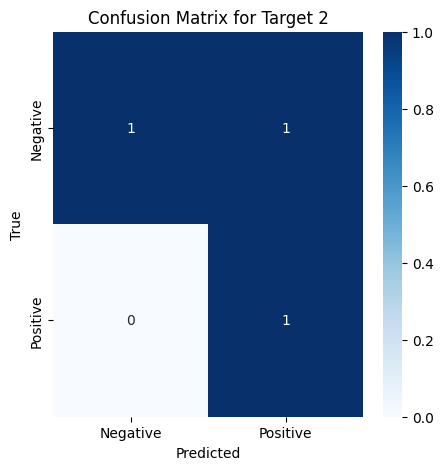

In [9]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cm = confusion_matrix(y_test_target, y_pred_target)
print(f' Confusion Matrix:\n{cm}')
print('\n')
